# Assignment-5                                                                    
                                                                             Partner Name:Prasad Hegde
 
                                                                                Partner userid:phegde

                               "All the work herein is solely mine"
                               
                               

## Problem 1: Pattern-matching: The brute-force

### Problem 1.1: The brute-force pattern-matching algorithm
Describe a text D and a pattern P such that the brute-force pattern-matching algorithm runs in
Ω(dp) time.The lengths of D and P are d and p, respectively.

The maximum number of comparisons in brute force occur when the pattern matches completely except the last character. Hence, at every alignment len(P) comparisons will be made. So we have to choose a pattern such that all but last character matches.

Consider Text D='aaaaaaaaab' and pattern P=aaab' where d=len(D)=10, p=len(P)=4. Observe P in D, we have 3 matching characters ('aaa') in each d-p iterations. Hence, our brute-force algorithm do (d-p)*(p-1) comparisions. Acknowledge that p is never greater than d or p<sup>2</sup> == dp.

Therefore, for above pattern and the text the brute-force pattern-matching algorithm runs in Ω(dp)

### Problem 1.2: Python’s str class and pattern-matching
In this part, you are asked to modify three pattern matching programs given to you (See appendix). Run your modified programs for varying-length patterns and show your results.
The count method in Python’s str class takes a text D and a pattern P and returns the maximum number of non-overlapping occurrences of a P within D. As an example ‘cdcdcdcdc’.count(‘cdc’) returns 2.

1. Modify the brute-force pattern-matching to return non-overlapping occurrences of a P within D.
2. Similar to the previous question (Problem 1.2.1), do the same on the Boyer-Moore program.
3. Similar to problem 1.2.1, modify the KMP program.

### Brute Force

In [68]:
# Modify the brute-force pattern-matching to return non-overlapping occurrences of a P within D. 
    # Brute force
def modified_find_brute(T, P):
    '''
    a count - keep count of non-overlapping pattern P in text T
    j pointer - where to start matching pattern next
    '''  
    n, m, count,j= len(T), len(P), 0,0
     # every starting position
    for i in range(n-m+1):
        k = 0
        # when text match the pattern, skip to the end of pattern
        if(j!=i):
            continue
    # conduct O(k) comparisons
        while k < m and T[i+k] == P[k]:
            k += 1
        if k == m:
            count+=1
            j=i+k
        else:
            j=i+1
    return count


print('no. of non overlapping cdc '+'in'+' cdcdcdcdc =',modified_find_brute('cdcdcdcdc','cdc'))
print('no. of non overlapping cd '+'in'+' cdcdcdcdc =',modified_find_brute('cdcdcdcdc','cd'))
print('no. of non overlapping cdcd '+'in'+' cdcdcdcdc =',modified_find_brute('cdcdcdcdc','cdcd'))
print('no. of non overlapping dcd '+'in'+' cdcdcdcdc =',modified_find_brute('cdcdcdcdc','dcd'))
print('no. of non overlapping aaba '+'in'+' aabaabaaba =',modified_find_brute('ABCABFC','ACC'))

no. of non overlapping cdc in cdcdcdcdc = 2
no. of non overlapping cd in cdcdcdcdc = 4
no. of non overlapping cdcd in cdcdcdcdc = 2
no. of non overlapping dcd in cdcdcdcdc = 2
no. of non overlapping aaba in aabaabaaba = 0


### Boyer Moore
Initialise, a **count** variable tokeep count of non-overlapping pattern P in text T. When the pattern is matched we increase the count by one and shift i such that we jump the matched text and continue matching next.

In [69]:
# Similar to the previous question (Problem 1.2.1), do the same on the Boyer-Moore program.
# Boyer - Moore
def modified_find_boyer_moore(T, P):
    n, m = len(T), len(P)
    count =  0
    if m == 0:
        return 0
    last = {}
    for k in range(m):
        last[P[k]] = k
    i = m-1
    k = m-1
    while i < n:
        # If match , decrease i,k
        if T[i] == P[k]:
            if k == 0:
                count+=1
                i=i+2*m-1
                k=m-1
            else:
                i -= 1
                k -= 1
        else:
            j = last.get(T[i], -1)
            i += m - min(k, j+1)
            k = m-1
    return count
print('no. of non overlapping cdc '+'in'+' cdcdcdcdc =',modified_find_boyer_moore('cdcdcdcdc','cdc'))
print('no. of non overlapping cd '+'in'+' cdcdcdcdc =',modified_find_boyer_moore('cdcdcdcdc','cd'))
print('no. of non overlapping cdcd '+'in'+' cdcdcdcdc =',modified_find_boyer_moore('cdcdcdcdc','cdcd'))
print('no. of non overlapping dcd '+'in'+' cdcdcdcdc =',modified_find_boyer_moore('cdcdcdcdc','dcd'))
print('no. of non overlapping aaba '+'in'+' aabaabaaba =',modified_find_boyer_moore('ABCABFC','ACC'))

no. of non overlapping cdc in cdcdcdcdc = 2
no. of non overlapping cd in cdcdcdcdc = 4
no. of non overlapping cdcd in cdcdcdcdc = 2
no. of non overlapping dcd in cdcdcdcdc = 2
no. of non overlapping aaba in aabaabaaba = 0


### KMP Algorithm
Initialize the **count** to zero. Increase the count whenever we find a pattern matching text, increase the pointer by one, and continue matching the pattern.

In [70]:
# Similar to problem 1.2.1, modify the KMP program.
# KMP failure function
def compute_kmp_fail(P):
    m = len(P)
    fail = [0] * m
    j = 1
    k = 0
    while j < m:
        if P[j] == P[k]:
            fail[j] = k+1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else:
            j += 1
    return fail

# KMP
def modified_find_kmp(T, P):
    n, m = len(T), len(P)
    count = 0
    if m == 0:
        return 0
    fail = compute_kmp_fail(P)
    # print(fail)
    j = 0
    k = 0
    while j < n:
        if T[j] == P[k]:
            if k == m-1:
                count+=1
                j+=1
                k=0
            else:
                j += 1
                k += 1
        elif k > 0:
            k = fail[k-1]
        else:
            j += 1
    return count

print('no. of non overlapping cdc '+'in'+' cdcdcdcdc =',modified_find_kmp('cdcdcdcdc','cdc'))
print('no. of non overlapping cd '+'in'+' cdcdcdcdc =',modified_find_kmp('cdcdcdcdc','cd'))
print('no. of non overlapping cdcd '+'in'+' cdcdcdcdc =',modified_find_kmp('cdcdcdcdc','cdcd'))
print('no. of non overlapping dcd '+'in'+' cdcdcdcdc =',modified_find_kmp('cdcdcdcdc','dcd'))
print('no. of non overlapping aaba '+'in'+' aabaabaaba =',modified_find_kmp('ABCABFC','ACC'))

no. of non overlapping cdc in cdcdcdcdc = 2
no. of non overlapping cd in cdcdcdcdc = 4
no. of non overlapping cdcd in cdcdcdcdc = 2
no. of non overlapping dcd in cdcdcdcdc = 2
no. of non overlapping aaba in aabaabaaba = 0


## Problem 2: Experimental Analysis of Pattern-Matching Algorithms
Perform an experimental analysis of pattern matching algorithms in terms of:
1. Number of character comparison: Perform an experimental analysis of the efficiency of
the brute-force, the KMP and Boyer-Moore pattern matching algorithms for varying-length
patterns.
2. Relative speed comparison: Perform an experimental comparison of the brute-force, KMP,
and Boyer-Moore pattern-matching algorithms. Run each algorithm against large text doc-
uments using varying-length patterns and report the relative running times.

In [71]:
import random
import time
import matplotlib.pyplot as plt

In [72]:
import random

# Brute force
def v1_find_brute(T, P):
    n, m = len(T), len(P)
    # every starting position
    comparisons = 0
    i = 0
    while i < (n-m+1):
        k=0
        while k < m:
            comparisons += 1
            if T[i + k] != P[k]:
                break
            k = k + 1
        if k==m:
            break
        else:
            i+=1
    return comparisons


# Boyer - Moore
def v1_find_boyer_moore (T , P ) :
    n , m = len ( T ) , len ( P )
    if m == 0:
        return 0
    last = {}
    for k in range ( m ) :
        last [ P [ k ]] = k
    i = m -1
    k = m -1
    comparisons = 0
    while i < n :
        comparisons += 1
        if T [i] == P[k]:
            if k == 0:
                return comparisons
                i += 1
            else:
                i -= 1
                k -= 1
        # Not match , reset the positions
        else:
            j = last.get (T[i],-1)
            i += m - min (k,j+1)
            k = m - 1
    return comparisons


# KMP failure function
def v1_compute_kmp_fail ( P ) :
    m = len ( P )
    fail = [0] * m
    j = 1
    k = 0
    while j < m :
        if P [ j ] == P [ k ]:
            fail [ j ] = k +1
            j += 1
            k += 1
        elif k > 0:
            k = fail [k -1]
        else :
            j += 1
    return fail

# KMP
def v1_find_kmp (T , P ) :
    n , m = len ( T ) , len ( P )
    if m == 0:
        return 0
    fail = v1_compute_kmp_fail ( P )
    # print ( fail )
    j = 0
    k = 0
    comparisons=0
    while j < n :
        comparisons += 1
        if T[j] == P[k]:
            j += 1
            k += 1
            if k == m :
                break
        elif k > 0:
            k = fail [k -1]
        else :
            j += 1
    return comparisons

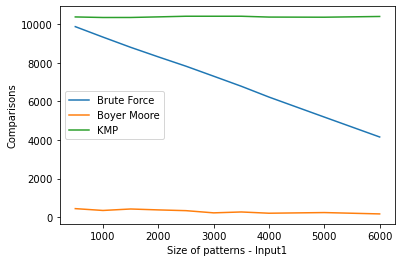

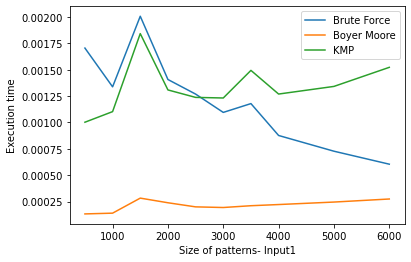

<Figure size 432x288 with 0 Axes>

In [73]:
import random
import time
import string
import matplotlib.pyplot as plt

random.seed(5)

lower_upper_alphabet = string.ascii_lowercase
input_char_list = [random.choice(lower_upper_alphabet) for i in range(10000)]
text = ''.join([str(elem) for elem in input_char_list])
    
def generate_pattern_sizes(Source_text):
    m=len(Source_text)
    percentages = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4,0.50,0.6]
    n=[int(x*len(Source_text)) for x in percentages]
    pattern_substring=[]
    for i in n:
        lower_upper_alphabet = string.ascii_lowercase
        input_char_list = [random.choice(lower_upper_alphabet) for i in range(i)]
        text = ''.join([str(elem) for elem in input_char_list])
        pattern_substring.append(text)
    return pattern_substring


def run_experiment_input1(text_string):
    final_time_brute=[]
    final_time_boyer=[]
    final_time_KMP=[]
    brute_k_comparisons=[]
    BM_k_comparison=[]
    KMP_k_comparison=[]
    pattern_substring=generate_pattern_sizes(text_string)
    for pattern in pattern_substring:
        pattern=pattern
        start_time=time.perf_counter()
        k1=v1_find_brute(text_string,pattern)
        final_time_brute.append(time.perf_counter()-start_time)
        brute_k_comparisons.append(k1)
        start_time1=time.perf_counter()
        k2=v1_find_boyer_moore(text_string,pattern)
        final_time_boyer.append(time.perf_counter()-start_time1)
        BM_k_comparison.append(k2)
        start_time2=time.perf_counter()
        k3=v1_find_kmp(text_string,pattern)
        final_time_KMP.append(time.perf_counter()-start_time2)
        KMP_k_comparison.append(k3)
    lengths = [len(x) for x in pattern_substring]
    plt.xlabel("Size of patterns - Input1",)
    plt.ylabel("Comparisons")
    plt.plot(lengths ,brute_k_comparisons, label = "Brute Force")
    plt.plot(lengths ,BM_k_comparison, label = "Boyer Moore")
    plt.plot(lengths ,KMP_k_comparison, label = "KMP ")
    plt.legend()
    plt.show()
    plt.clf()
    plt.xlabel("Size of patterns- Input1")
    plt.ylabel("Execution time")
    plt.plot(lengths ,final_time_brute, label = "Brute Force")
    plt.plot(lengths ,final_time_boyer, label = "Boyer Moore")
    plt.plot(lengths ,final_time_KMP, label = "KMP ")
    plt.legend()
    plt.show()
    plt.clf()
    

run_experiment_input1(text)

### Analysis of Character comparisons  and Execution times:

We need to calculate the number of comparisons made for checking if a pattern is matching or not matching.The above programs are modified to inculcate the counting of comparisons made. As told we need to compare three patttern matching algorithms.
* Brute Force
* Boyer-Moore Algorithm
* KMP algorithm

Each of these algorithms work the best for different types of text inputs.For example KMP works best when the pattern has repeating sub-patterns(For example: DNA sequences).

We have considered different types of inputs to show how the character comparisons happen.We are using the below code to generate src_text from a given set of alphabet and range of 100000.
~~~
lower_upper_alphabet = string.ascii_lowercase
input_char_list = [random.choice(lower_upper_alphabet) for i in range(10000)]
text = ''.join([str(elem) for elem in input_char_list])
~~~
The text is passed as input string to all three algorithms to get the comparisons.

In order to generate patterns of different length a *generate_pattern_sizes()* function is used which takes src_text as input and generates substring as patterns of varying length from a random index. The length of pattern are determined as percentages given.
~~~
 percentages = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
~~~
The *run_experiment_input1()* takes the src_text and generate a lists of k_comparisions and execution time for all the three algorithms above. We have plotted 2 graphs:
1. Graph of comparisons made against Size of patterns.
2. Graph of execution time against Size of patterns.

### Graph Analysis:

**Graph1:** Graph of comparisons made against Size of patterns.

We can observe that Boyer moore performs better compared to brute-force or KMP for the given above set of input because in BoyerMoore algorithm the alphabet input is big(range of alphabet) and given there a mismatch between the last character of pattern and character of src_text corresponding to it.Scanning backwards with Boyer Moore Algorithm is sometimes faster because if we spot a character that isn't in the pattern, then we can skip many spaces forward. Therefore for a searching a document of english text of big sizes Boyer Moore performs the best.In the best case scenario, we may only need to compare the last character every time, and skip forward the full length of the word. 

We can observe that brute force comparisons are usually large in number but it has a decreasing trend because the length of the src_text to be compared decreases by the length of pattern p when the size of pattern increases.We can observe a best case of brute force when there is a mismatch in the first character of pattern only.Then it does length of src_text number of comparisons.

KMP algorithm performs the best for text which has a limited alphabet set like Protiens sequences, DNA sequences etc.KMP algorithm performs the best when there are overlapping character or alphabet present.

**Graph2:** Graph of execution time against Size of patterns.

From the above graphs we can corelate that execution times are proportional to the comparisons made.Hence the execution time of Boyer Moore is less compared to Brute force and KMP.This is because comparison is the main task that is time consuming action that happens in all the three algorithms. However there might be little overhead added from other functions within the algorithm but it is small comparably.


## Problem 3: Matrix-chain Multiplication
The matrix-chain multiplication problem: Given a chain of < D 1 , D 2 , . . . , D n > of n matrices fully
parenthesize the product < D 1 ·D 2 · · · D n > in a way so that the number of scalar multiplications
is minimized. Each D i has a p i−1 × p i dimension and i = 1, 2, . . . , n.

### 1. The Brute-Force:
Implement a Python program to solve the matrix-chain multiplication problem by the brute force algorithm.

In [74]:

def minScalarOperations(chain, i, j, s):
    if i == j:
        return 0
    
    min = float('inf')
    k=i
    # for all possible paranthesis placements
    # return minimum number of scalar multiplication
    while k<j:
        count = minScalarOperations(chain, i, k, s) + minScalarOperations(chain, k + 1, j, s) + chain[i-1] * chain[k] * chain[j]

        if count < min:
            min = count
            s[i][j] = k
        k+=1
    return min

chain1 = [30,35,15,5]

s = [['' for i in range(len(chain1))] for j in range(len(chain1))]
print("The minimum number of scalar multiplications is ",
	minScalarOperations(chain1, 1, len(chain1)-1, s))
print("Solution: ", print_optimal_parens(s, 1, len(chain1)-1))


def print_optimal_parenthesis(s, i, j):
    if i == j:
        return 'A{}'.format(i)
    else:
        return "({}{})".format(print_optimal_parenthesis(s, i, s[i][j]), print_optimal_parens(s, s[i][j] + 1, j))


The minimum number of scalar multiplications is  7875
Solution:  (A1(A2A3))


### Brute Force Approach:

In the brute force approach we calculate the minimum cost of multiplication recursively. It carries out a exhaustive search to determine the minimum value.

The cost of multiplication mainly depend on 2 operations:
1. cost of multiplying matrices if i==j and i ==0 and j==0
2. cost of multiplying matrices between i and j and we take the minimum value of it.

While placing the parenthesis it checks every position where it can place a parenthesis.

Brute forces runs in exponential time complexity.

### 2. Bottom-up Dynamic Programming:
Implement a Python program to solve the matrix-chain multiplication problem using bottom-up dynamic programming approach.

In [75]:
def minScalarOperations(p, n):
    costMatrix = [[0 for x in range(n)] for x in range(n)]
    s = [['' for i in range(n)] for j in range(n)]
    chainLen=2

    while chainLen<n:
        for i in range(1,n-chainLen+1):
            j = i+chainLen-1
            costMatrix[i][j] = float('inf')
            for k in range(i, j):
                # calculate cost
                cost = costMatrix[i][k] + costMatrix[k+1][j] + p[i-1]*p[k]*p[j]
                if cost<costMatrix[i][j]:
                    costMatrix[i][j] = cost
                    s[i][j] = k
        chainLen+=1
    return costMatrix[1][n-1], s
  

chain1 = [30,35,15,5,10,20,25]

cost, s = minScalarOperations(chain1, len(chain1))
print("The minimum number of scalar multiplications is ", cost)

print("Solution: ", print_optimal_parenthesis(s, 1, len(chain1)-1))

The minimum number of scalar multiplications is  15125
Solution:  ((A1(A2A3))((A4A5)A6))


### Bottom Up Dynamic Programming Approach:
In Bottom up approach we resolve the subproblems first and then pass this result to bigger problems.

Here we calculate the cost for the sub problems with increasing lengths. For matrix of length 1 the cost is zero. So for lengths above 2 we calculate the cost and select the minimum cost among into the cost-matrix

With the help of cost matrix we can determine the right placement of brackets.
### Implementation:
1. We calculate the cost required for multiplying different number of matrices and store the cost in 2D list-**costMatrix**
2. Let's say we want to know minimum cost for ABCDE 
3. We calculate costs for A, AB, ABC.. so on for different chain length and store it in our cost matrix. And for each of this chain length we are interested in the minimum cost, which is achieved by calculating cost for different paranthesis placements, and chosing the minimum among them.
4. We have calculated costs for different chain lengths (1,2,3...n). So the final cost we are interested in is of chain length n.

Therefore, costMatrix[1][n-1], where n is the length of the chain will have the minumum cost that is required to perform complete multiplication.

### Time Complexity:

The time complexity might be cubic because there are 3 loops used to calculate the minimum cost. But it is much better than brute force which in exponentional time.

### 3. Dynamic Programming with Memoization [Extra Credit]: 
Implement a Python program to solve the matrix-chain multiplication problem using dynamic programming with
memoization.

###  Dynamic Programming with Memoization  [Extra Credit]:

Memoization is a top-down approach which uses recursion to calculate the minimum multiplication cost.

It stores the precomputed results to avoid computation everytime for the same subproblem.

 When a recusive call is made, first we check whether the solution already exists in the memo if yes,we return the precomputed solution.If the solution does not exist in the memo, then we compute the result, memoize it and then return the computed result.

### Implementation:
When we calculate differenty paranthesised product cost. We save the cost. 
1. Create a 2D list dp of size 100*100 and initialise with -1
2. Recursively paranthise and calculate the cost in multiplication, if the particular cost has not been calculated already, store this cost in relevent cell of the 2D list, else refer to the stored cost
3. Update dp[i][j] with the minimum cost of stored cost and recursively calculated cost 

dp[1][n-1] will give us the minimum cost that is required to calculate complete product of matrix chain.


In [76]:
dp = [[-1 for i in range(100)] for j in range(100)]

def minOperationMemoized(p,i,j,s):

    if(i == j):
        return 0

    if(dp[i][j] != -1):
        return dp[i][j]

    dp[i][j] = float('inf')
    k=0
    while k<j:
        cost = minOperationMemoized(p, i, k,s) + minOperationMemoized(p, k + 1, j, s)+ p[i - 1] * p[k] * p[j]
        if cost < dp[i][j]:
            dp[i][j] = cost
            s[i][j] = k
        k+=1
    return dp[i][j]

chain1 = [30,35,15,5,10,20,25]

s = [['' for i in range(len(chain1))] for j in range(len(chain1))]
print("The minimum number of scalar multiplications is ",
     minOperationMemoized(chain1, 1,len(chain1)-1, s))
print("Solution: ", print_optimal_parenthesis(s, 1, len(chain1)-1))

The minimum number of scalar multiplications is  15125
Solution:  ((A1(A2A3))((A4A5)A6))


## Problem 4: Longest Common Sub-sequence (LCS) Problem
Implement a Python program to solve LCS problem using dynamic programming. Run your program to find the best sequence alignment between DNA strings. Show your results.

*Longest Common Sub-sequence (LCS) problem: Given two character strings over some alphabet, find a longest string that is a sub-sequence of given two strings.*

In [80]:
def longest_common_substring(Text1, Text2):
    lcs_matrix = [["" for x in range(len(Text2))] for x in range(len(Text1))]
    # iterate over character of text1
    for i in range(len(Text1)):
        # iterate over character of text2
        for j in range(len(Text2)):
#             if characters match
            if Text1[i] == Text2[j]:
#                 if at starting postion
                if i == 0 or j == 0:
                    lcs_matrix[i][j] = Text1[i]
                else:
                    # if value is grater than the left or top parent 
                    lcs_matrix[i][j] = lcs_matrix[i-1][j-1] + Text1[i]
            else:
#                 if value matches with the left or top parent take the maximum
                lcs_matrix[i][j] = max(lcs_matrix[i-1][j], lcs_matrix[i][j-1] , key=len)
    common_substring = lcs_matrix[-1][-1]
    return common_substring.upper()

In [81]:
text1="acaaatatggccgtcccaggacttcaataagaccaaaaacatatgagccgataaacgtacgtaatataaaacctcgaaacagggtatatggcacagtgga"
text2="tatgcgggcggccatgcgcctcccgttctgctacgaggtccatccggtttttcctgcacgctagtcagttcgcacccggaccttcacttagagctgtctc"
longest_common_substring(text1,text2)

'ACATGGCCTCCCGTTCTGCACATATGGCCGACGTAGTATTAACCTCACTTAGGCCT'

In [82]:
text3="agtc"
text4="agtc"
longest_common_substring(text3,text4)

'AGTC'

### Output:
Given two DNA Sequence as input:
text1="acaaatatggccgtcccaggacttcaataagaccaaaaacatatgagccgataaacgtacgtaatataaaacctcgaaacagggtatatggcacagtgga"

text2="tatgcgggcggccatgcgcctcccgttctgctacgaggtccatccggtttttcctgcacgctagtcagttcgcacccggaccttcacttagagctgtctc"

longest_common_substring(text1,text2)

**Output:** ACATGGCCTCCCGTTCTGCACATATGGCCGACGTAGTATTAACCTCACTTAGGCCT

### Implementation:

Longest common subsequence uses tabulation method to compute the length of longest subsequence in the increasing order of indices from both the input string .

In the above program calculate the longest common substring length using a 2D list of length m+1 and n+1.This is because while computing the table we take the initial row and column as null to avoid underflow. 

#### Algorithm:

~~~
if S1[i]==S2[j]
    LCS[i][j]= LCS[i-1][j-1]+1
else
    LCS[i][j]=max(LCS[i-1][j],LCS[i][j-1])
~~~

After calculating the LCS value we backtrack the table bottom up to find the common subtrings and print them.

**Time Complexity:**
If m and n are the length of the two sequences respectively then time complexity will be O(mn).

**Space Complexity:**
If m and n are the size of the two sequences respectively then space required by this algorithm will be O(m+n).

